# Vanilla Deep Q-Learning 
---

This is a relatively simple version of the algorithm, it differs from classical Q-Learning in four main ways:
- we are using a neural network to estimate the state-action value
- the neural network estimates all state-action values for a given state
- we are using Replay Buffer to store the `s, a, r, s', done` tuples, and learning from the data sampled from the Replay Buffer, not from immediate experience.
- we are using the decaying exploration rate $\epsilon$. In the beginning of learning the agent is exploring a lot, and the exploration rate is reduced in time.



In [1]:
# Import packages
import gym
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ('Device:', device)

import config

Device: cuda:0


In [2]:
env = gym.make(config.ENVIRONMENT)

In [3]:
from lib.basic_agent import Agent

agent = Agent(
    state_size=env.observation_space.shape[0], 
    action_size=env.action_space.n, device = device)


In [4]:
def train_agent(n_episodes=config.MAX_EPISODES, 
        max_t=config.MAX_TIMESTEPS, 
        eps_start=config.EPSILON_START, 
        eps_end=config.EPSILON_END, 
        eps_decay=config.EPSILON_DECAY,
        expected_reward = config.EXPECTED_REWARD,
        ):
    """Deep Q-Learning.
    Args:
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for 
            epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): decay factor (per episode) 
            for decreasing epsilon
        finish_threshold (float): finish when the average score
            is greater than this value
    Returns:
        scores (list): list of scores from each episode
    """
    scores = []                        
    scores_window = deque(maxlen=100)  
    eps = eps_start                    
    for episode in range(1, n_episodes+1):
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       
        scores.append(score)
        
        # Decay epsilon by multiplying it by eps_decay             
        eps = max(eps_end, eps_decay*eps) 
        
        mean_score = np.mean(scores_window)
        
        print(f'\rEpisode {episode}\tAverage Score: {mean_score:.2f}     ', end="")
        
        if episode % 100 == 0:
            
            print(f'\rEpisode {episode}\tAverage Score: {mean_score:.2f}')
            agent.save('checkpoint.pth')
        if mean_score >= expected_reward:
            print(f'\nDone in {episode:d} episodes!\tAverage Score: {mean_score:.2f}')
            agent.save('checkpoint.pth')
            break
    return scores

### Train the agent


Episode 100	Average Score: 18.33     
Episode 200	Average Score: 12.85     
Episode 300	Average Score: 38.33     
Episode 400	Average Score: 118.96     
Episode 427	Average Score: 235.69     
Done in 427 episodes!	Average Score: 235.69


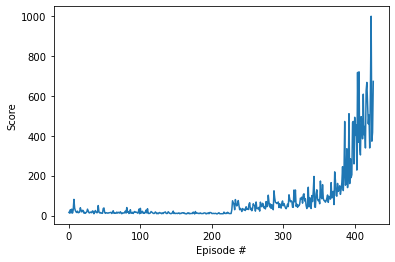

In [5]:
scores = train_agent()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()